<a href="https://colab.research.google.com/github/LuaSolution/IHTGo-Server/blob/master/Week2/chap3_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Chapter 3 - Demo: Logistic Regression</h1>**

* **Do đây là bài toán regression nên tổng xác suất = 1, ngưỡng 0 - 1**
* **Ban đầu sử dụng cho 2 lớp, nhưng có thể mở rộng lên nhiều lớp**
* **Sử dụng được cho các mô hình tuyến tính và các cột dữ liệu phải độc lập**
* **Với những bài toán tuyến tính phải chú ý thang đo dữ liệu, nếu như nó quá khác biệt ví dụ như Salary <> Thâm niên, Income <> Tuổi (lương vài triệu, tuổi và thâm niên chỉ vài chục), thì phải scale nó lại.**
> * Nếu phân phối lệch phải: **Log Scaler**
> * Nếu phân phối chuẩn: **Standard Scaler**
> * Nếu phân phối không chuẩn, không outlier: **Min Max Scaler**
> * Nếu phân phối không chuẩn, có outlier: **Robust Scaler** 


In [1]:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/LuaSolution/ML-with-Python-lds6/master/Week_2/data/Social_Network_Ads.csv',
                   usecols=['Age', 'EstimatedSalary_K', 'Purchased'])
data.head(5)

,Age,EstimatedSalary_K,Purchased
0,19,19,0
1,35,20,0
2,26,43,0
3,27,57,0
4,19,76,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                400 non-null    int64
 1   EstimatedSalary_K  400 non-null    int64
 2   Purchased          400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [11]:
X = pd.DataFrame(data[['Age', 'EstimatedSalary_K']])
X.head()

,Age,EstimatedSalary_K
0,19,19
1,35,20
2,26,43
3,27,57
4,19,76


In [13]:
y = data['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [24]:
# Cắt dữ liệu cho bộ training và bộ test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Tiến hành tạo model Loggistic Regression
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logR.score(X_train, y_train)

0.8375

In [27]:
logR.score(X_test, y_test)

0.8875

In [29]:
Y_predicted = logR.predict(X_test)
Y_predicted

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [37]:
# Kết luận và đánh giá mô hình thông qua tỷ lệ chính xác
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_predicted) * 100

88.75

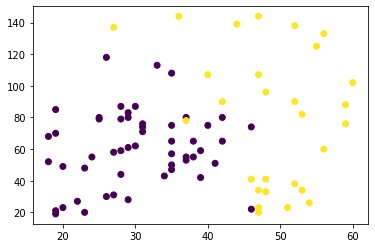

In [32]:
# Vẽ sơ đồ tương quan dữ liệu giữa data thực tế và data dự đoán
plt.scatter(X_test.Age, X_test.EstimatedSalary_K, c=y_test)
plt.show()

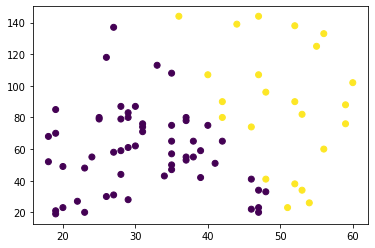

In [33]:
plt.scatter(X_test.Age, X_test.EstimatedSalary_K, c=Y_predicted)
plt.show()